<a href="https://colab.research.google.com/github/achantszshun/323project/blob/main/323.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
GDP_Data = pd.read_csv('/content/323_project/GDP_Data.csv', skiprows=3)
Capital_Stock_Data = pd.read_csv('/content/323_project/Capital_Stock_Data.csv', skiprows=3)
Gross_Savings_Data = pd.read_csv('/content/323_project/Gross_Savings_Data.csv', skiprows=3)
Population_Data = pd.read_csv('/content/323_project/Population_Data.csv', skiprows=3)
Labor_Force_Data = pd.read_csv('/content/323_project/Labor_Force_Data.csv', skiprows=3)



In [76]:
# List of countries to include
selected_countries = [
    "United States", "Germany", "Japan", "Australia", "Canada", "Saudi Arabia", "Poland", "Greece",
    "Brazil", "China", "South Africa", "Russia", "Argentina", "Mexico", "Turkey", "Thailand", "Colombia",
    "India", "Egypt", "Bangladesh", "Vietnam", "Kenya", "Indonesia",
    "Uganda", "Mozambique", "Rwanda", "Madagascar", "Tanzania"
]

# Filter for the selected countries
GDP_Data1 = GDP_Data[GDP_Data['Country Name'].isin(selected_countries)]
Capital_Stock_Data1 = Capital_Stock_Data[Capital_Stock_Data['Country Name'].isin(selected_countries)]
Gross_Savings_Data1 = Gross_Savings_Data[Gross_Savings_Data['Country Name'].isin(selected_countries)]
Population_Data1 = Population_Data[Population_Data['Country Name'].isin(selected_countries)]
Labor_Force_Data1 = Labor_Force_Data[Labor_Force_Data['Country Name'].isin(selected_countries)]

# Select the first three columns, plus the columns within the year range 1991-2023
columns_GDP = ["Country Name", "Country Code", "Indicator Name"] + \
              [col for col in GDP_Data.columns if col.isdigit() and 1991 <= int(col) <= 2023]

columns_GDI = ["Country Name", "Country Code", "Indicator Name"] + \
              [col for col in Capital_Stock_Data.columns if col.isdigit() and 1991 <= int(col) <= 2023]

columns_Pop = ["Country Name", "Country Code", "Indicator Name"] + \
              [col for col in Population_Data.columns if col.isdigit() and 1990 <= int(col) <= 2023]

columns_savings = ["Country Name", "Country Code", "Indicator Name"] + \
                  [col for col in Gross_Savings_Data.columns if col.isdigit() and 1991 <= int(col) <= 2023]

columns_labor = ["Country Name", "Country Code", "Indicator Name"] + \
                [col for col in Labor_Force_Data.columns if col.isdigit() and 1991 <= int(col) <= 2023]

# Apply the columns filter to each dataset
GDP_Data2 = GDP_Data1[columns_GDP]
Capital_Stock_Data2 = Capital_Stock_Data1[columns_GDP]
Population_Data2 = Population_Data1[columns_Pop]
Gross_Savings_Data2 = Gross_Savings_Data1[columns_savings]
Labor_Force_Data2 = Labor_Force_Data1[columns_labor]

# Define a function to calculate annual growth
def calculate_annual_growth(row):
    growth_rates = {}
    for year in range(1991, 2024):
        growth_rates[str(year)] = ((row[str(year)] - row[str(year - 1)]) / row[str(year - 1)]) * 100
    return pd.Series(growth_rates)

# Apply the function to each row and create the Population Growth Data
Population_Growth_Data = Population_Data2.apply(calculate_annual_growth, axis=1)

# Add back the identifier columns
Population_Growth_Data = pd.concat([Population_Data2[["Country Name", "Country Code", "Indicator Name"]], Population_Growth_Data], axis=1)

# Rename "Population, growth" in the Indicator Name column to "Pop Annual Growth Rate"
Population_Growth_Data["Indicator Name"] = Population_Growth_Data["Indicator Name"].replace("Population, total", "Pop Annual Growth Rate")

with pd.ExcelWriter('Project_Data.xlsx') as writer:
    GDP_Data2.to_excel(writer, sheet_name='GDP Data', index=False)
    Capital_Stock_Data2.to_excel(writer, sheet_name='Capital Stock Data', index=False)
    Gross_Savings_Data2.to_excel(writer, sheet_name='Gross Savings Data', index=False)
    Population_Growth_Data.to_excel(writer, sheet_name='Population Data', index=False)
    Labor_Force_Data2.to_excel(writer, sheet_name='Labor Force Data', index=False)

# Load each cleaned dataset
GDP_Data_Cleaned = pd.read_excel('Project_Data.xlsx', sheet_name='GDP Data')
Capital_Stock_Data_Cleaned = pd.read_excel('Project_Data.xlsx', sheet_name='Capital Stock Data')
Gross_Savings_Data_Cleaned = pd.read_excel('Project_Data.xlsx', sheet_name='Gross Savings Data')
Population_Data_Cleaned = pd.read_excel('Project_Data.xlsx', sheet_name='Population Data')
Labor_Force_Data_Cleaned = pd.read_excel('Project_Data.xlsx', sheet_name='Labor Force Data')


# Drop metadata columns to work only with the year columns
GDP_years = GDP_Data_Cleaned.drop(columns=['Country Name', 'Country Code', 'Indicator Name'])
Capital_Stock_years = Capital_Stock_Data_Cleaned.drop(columns=['Country Name', 'Country Code', 'Indicator Name'])
Gross_Savings_years = Gross_Savings_Data_Cleaned.drop(columns=['Country Name', 'Country Code', 'Indicator Name'])
Labor_Force_years = Labor_Force_Data_Cleaned.drop(columns=['Country Name', 'Country Code', 'Indicator Name'])
Population_years = Population_Data_Cleaned.drop(columns=['Country Name', 'Country Code', 'Indicator Name'])

# Create a combined DataFrame with dictionary values
combined_years = GDP_years.apply(lambda row: [
    {
        'GDP': gdp,
        'Capital Stock': capital,
        'Gross Savings': savings,
        'Labor Force': labor,
        'Population': population
    }
    for gdp, capital, savings, labor, population in zip(
        row,
        Capital_Stock_years.loc[row.name],
        Gross_Savings_years.loc[row.name],
        Labor_Force_years.loc[row.name],
        Population_years.loc[row.name]
    )
], axis=1)

# Convert lists of dictionaries to columns, setting each cell explicitly as object type
combined_years = pd.DataFrame(combined_years.tolist(), index=combined_years.index, columns=GDP_years.columns, dtype="object")

# Concatenate metadata columns back with the combined data columns
combined_data = pd.concat(
    [GDP_Data_Cleaned[['Country Name', 'Country Code', 'Indicator Name']].copy(), combined_years], axis=1
)

# Update Indicator Name for clarity
combined_data['Indicator Name'] = 'Dictionary (GDP, Capital Stock, Gross Savings, Labor Force, Population)'

# Save the final combined panel dataset to an Excel file
combined_data.to_excel("Final_Dataset.xlsx", index=False)

df = "Final_Dataset.xlsx"
df = pd.read_excel(df)
df.head()


,Country Name,Country Code,Indicator Name,1991,1992,1993,1994,1995,1996,1997,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Argentina,ARG,"Dictionary (GDP, Capital Stock, Gross Savings,...","{'GDP': 190000000000.0, 'Capital Stock': 27769...","{'GDP': 229000000000.0, 'Capital Stock': 38211...","{'GDP': 237000000000.0, 'Capital Stock': 46609...","{'GDP': 257000000000.0, 'Capital Stock': 51399...","{'GDP': 258000000000.0, 'Capital Stock': 47736...","{'GDP': 272000000000.0, 'Capital Stock': 53406...","{'GDP': 293000000000.0, 'Capital Stock': 60990...",...,"{'GDP': 526000000000.0, 'Capital Stock': 90857...","{'GDP': 595000000000.0, 'Capital Stock': 10200...","{'GDP': 558000000000.0, 'Capital Stock': 98478...","{'GDP': 644000000000.0, 'Capital Stock': 11700...","{'GDP': 525000000000.0, 'Capital Stock': 87192...","{'GDP': 448000000000.0, 'Capital Stock': 63626...","{'GDP': 386000000000.0, 'Capital Stock': 55605...","{'GDP': 488000000000.0, 'Capital Stock': 88102...","{'GDP': 631000000000.0, 'Capital Stock': 11100...","{'GDP': 641000000000.0, 'Capital Stock': 12500..."
1,Australia,AUS,"Dictionary (GDP, Capital Stock, Gross Savings,...","{'GDP': 326000000000.0, 'Capital Stock': 78950...","{'GDP': 326000000000.0, 'Capital Stock': 72741...","{'GDP': 312000000000.0, 'Capital Stock': 73669...","{'GDP': 323000000000.0, 'Capital Stock': 78349...","{'GDP': 368000000000.0, 'Capital Stock': 95700...","{'GDP': 401000000000.0, 'Capital Stock': 99487...","{'GDP': 436000000000.0, 'Capital Stock': 10800...",...,"{'GDP': 1470000000000.0, 'Capital Stock': 3920...","{'GDP': 1350000000000.0, 'Capital Stock': 3550...","{'GDP': 1210000000000.0, 'Capital Stock': 3070...","{'GDP': 1330000000000.0, 'Capital Stock': 3200...","{'GDP': 1430000000000.0, 'Capital Stock': 3510...","{'GDP': 1390000000000.0, 'Capital Stock': 3240...","{'GDP': 1330000000000.0, 'Capital Stock': 2960...","{'GDP': 1560000000000.0, 'Capital Stock': 3550...","{'GDP': 1690000000000.0, 'Capital Stock': 3990...","{'GDP': 1720000000000.0, 'Capital Stock': 4050..."
2,Bangladesh,BGD,"Dictionary (GDP, Capital Stock, Gross Savings,...","{'GDP': 30957483950.0, 'Capital Stock': 523056...","{'GDP': 31708874594.0, 'Capital Stock': 548723...","{'GDP': 33166519418.0, 'Capital Stock': 595233...","{'GDP': 33768660883.0, 'Capital Stock': 621429...","{'GDP': 37939748769.0, 'Capital Stock': 725400...","{'GDP': 46438484108.0, 'Capital Stock': 962667...","{'GDP': 48244309133.0, 'Capital Stock': 105250...",...,"{'GDP': 173000000000.0, 'Capital Stock': 49407...","{'GDP': 195000000000.0, 'Capital Stock': 56371...","{'GDP': 265000000000.0, 'Capital Stock': 80203...","{'GDP': 294000000000.0, 'Capital Stock': 90901...","{'GDP': 321000000000.0, 'Capital Stock': 10200...","{'GDP': 351000000000.0, 'Capital Stock': 11300...","{'GDP': 374000000000.0, 'Capital Stock': 11700...","{'GDP': 416000000000.0, 'Capital Stock': 12900...","{'GDP': 460000000000.0, 'Capital Stock': 14700...","{'GDP': 437000000000.0, 'Capital Stock': 13500..."
3,Brazil,BRA,"Dictionary (GDP, Capital Stock, Gross Savings,...","{'GDP': 343000000000.0, 'Capital Stock': 67714...","{'GDP': 328000000000.0, 'Capital Stock': 62141...","{'GDP': 368000000000.0, 'Capital Stock': 76775...","{'GDP': 525000000000.0, 'Capital Stock': 11600...","{'GDP': 769000000000.0, 'Capital Stock': 13300...","{'GDP': 850000000000.0, 'Capital Stock': 14700...","{'GDP': 883000000000.0, 'Capital Stock': 15700...",...,"{'GDP': 2460000000000.0, 'Capital Stock': 5050...","{'GDP': 1800000000000.0, 'Capital Stock': 3140...","{'GDP': 1800000000000.0, 'Capital Stock': 2690...","{'GDP': 2060000000000.0, 'Capital Stock': 3020...","{'GDP': 1920000000000.0, 'Capital Stock': 2890...","{'GDP': 1870000000000.0, 'Capital Stock': 2910...","{'GDP': 1480000000000.0, 'Capital Stock': 2380...","{'GDP': 1670000000000.0, 'Capital Stock': 3260...","{'GDP': 1950000000000.0, 'Capital Stock': 3530...","{'GDP': 2170000000000.0, 'Capital Stock': 3500..."
4,Canada,CAN,"Dictionary (GDP, Capital Stock, G

In [ ]:
df_melted = df.melt(
    id_vars=["Country Name"],
    var_name="Year",
    value_name="Data"
)
df_expanded = pd.concat([
    df_melted.drop(columns=["Data"]),
    ], axis=1)

# Select and sort the final columns
df_final = df_expanded[[
    "Country Name",
    "Year",
    "GDP",
    "Capital Stock",
    "Gross Savings",
    "Labor Force",
    "Population"
]].copy()

df_final = df_final.sort_values(['Country Name', 'Year']).reset_index(drop=True)

# Save the cleaned dataset
df_final.to_excel("Tidied_Dataset.xlsx", index=False)

In [84]:
df = pd.read_excel("Tidied_Dataset.xlsx")
df.head()

,Country Name,Year,GDP,Capital Stock,Gross Savings,Labor Force,Population
0,Argentina,"1,991.00","237,000,000,000.00","46,609,970,270.00","40,917,630,631.00","14,697,546.00",1.37
1,Argentina,"1,992.00","257,000,000,000.00","51,399,500,500.00","43,484,681,200.00","15,067,090.00",1.36
2,Argentina,"1,993.00","258,000,000,000.00","47,736,933,000.00","46,677,313,000.00","15,201,443.00",1.33
3,Argentina,"1,994.00","272,000,000,000.00","53,406,319,800.00","51,639,312,000.00","15,563,537.00",1.27
4,Argentina,"1,995.00","293,000,000,000.00","60,990,966,300.00","54,505,788,900.00","15,992,986.00",1.21


Exploratory Data Analysis

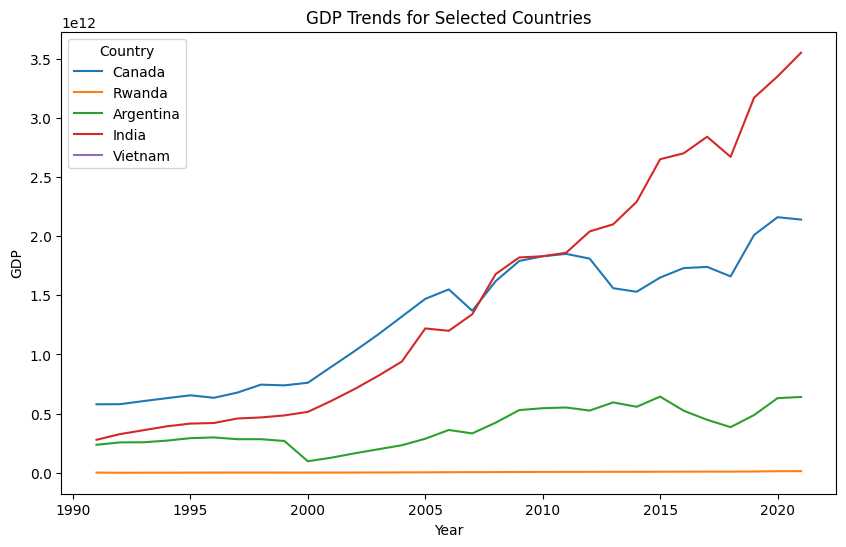

In [88]:
#im gonna select 5 countries to make things a bit more simple

countries_1 = ["Canada", "Rwanda", "Argentina", "India", "Vietnam"]
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

def GDP_plot_for_countries(countries):
  plt.figure(figsize=(10, 6))
  for country in countries:
    interval = df[df["Country Name"] == country]
    plt.plot(interval["Year"], interval["GDP"], label = country)
  plt.title("GDP Trends for Selected Countries")
  plt.xlabel("Year")
  plt.ylabel("GDP")
  plt.legend(title = "Country")
  plt.show()

GDP_plot_for_countries(countries_1)
#change list of countries to plot whatever
#didnt know Rwanda had 0 gdp thats tough lmao

In [ ]:
#lets also plot the other 4 metrics, S, K, L and N (population)

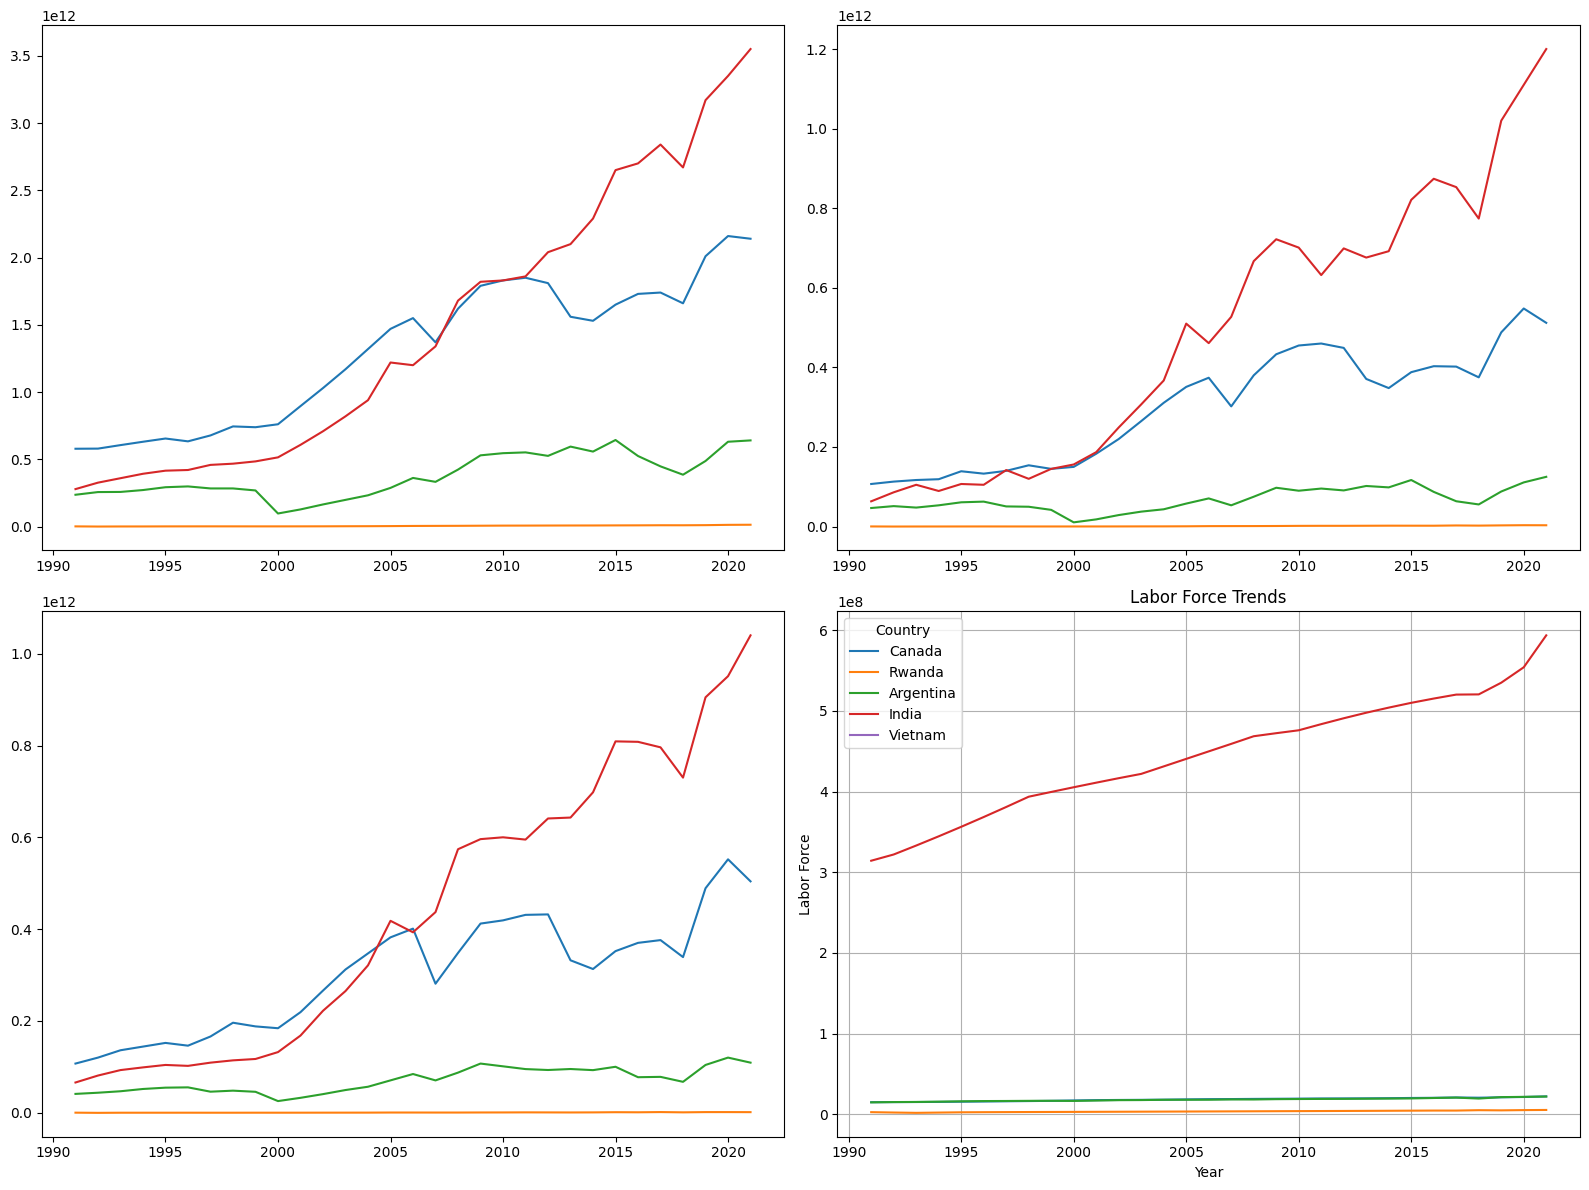

In [91]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Example for four different metrics
metrics = ['GDP', 'Capital Stock', 'Gross Savings', 'Labor Force']
titles = ['GDP Trends', 'Capital Stock Trends', 'Gross Savings Trends', 'Labor Force Trends']

# Iterate through axes and plot different metrics
def metrics_plot_for_countries(countries):
  for i, ax in enumerate(axes.flat):
    for country in countries:
        interval = df[df["Country Name"] == country]
        ax.plot(interval['Year'], interval[metrics[i]], label=country)
  ax.set_title(titles[i])
  ax.set_xlabel('Year')
  ax.set_ylabel(metrics[i])
  ax.legend(title="Country")
  ax.grid()
  plt.tight_layout()
  plt.show()

metrics_plot_for_countries(countries_1)